# Шаг №1. Открываем файл и изучаем общую информацию.

<font color='magenta'><b>Комментарий наставника: </b> Привет! Спасибо за раннюю сдачу проекта. Сделанно все на очень высоком уровне - и код, и выводы, и оформление. Очень аккуратно обращаешься с данными на этапе их очистки и заполнения пропусков. Применение лемматизации - просто супер!  Отличные графики, и они использованны в нужных местах. Правильно формулируешь гипотезы. И вообще сильно выросло качество относительно первых проектов. Но нужны небольшие доработки:
    
1) В столбцах с рейтингами есть значение 'tbd'. Нужно на этапе предобраотки данных понять, что это такое и что с ним сделать.
2) Какие платформы ты считаешь наиболее перспективными в следующем году?
3) Дополни работу еще одним графиком - "Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами".

И задачка прям совсем "на подумать" - нет ли более удачного определения "актуальный период"? Понятно, что для изучения вопроса "сколько живет платформа" твое решение идеально, но идеально ли оно для изученяи других вопросов?
</font>

<font color='magenta'><b>Комментарий наставника 2: </b> Работа принята. "Актуальный период" теперь определен лучше, хотя и не идеально. Обязательно будь сегодня на консультации, будем там обсуждать этот вопрос. </font>

In [1]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
import matplotlib.pyplot as plt
import math
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')

In [2]:
shape_before = data.shape[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>В нашем файле 16715 строк, не во всех столбцах полные данные. Рассмотрим каждый столбец с пропущенными данными подробнее и решим как поступать с пропущенными значениями.</b>

# Шаг №2. Подготовка данных.

## Переименование столбцов.

<b>Названия должны быть набраны в одном регистре, чтобы не заучивать уникальный формат для каждого столбца</b>

In [3]:
new_names = []

for k in data.columns:
    new_names.append(k.lower())
    
data.set_axis(new_names, axis='columns', inplace=True)
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


## Обработка пропущенных значений.

<b>Первый столбец, в котором будем рассматривать пропущенные значения, это столбец 'name'</b>

In [4]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры 1993 года, без данных в жанре, рейтинге критиков, пользователей и возрастного рейтинга и с минимальными продажами. Удалим эти две строки.

In [5]:
data.dropna(subset = ['name'], inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<b>Второй столбец, в котором будем рассматривать пропущенные значения, это столбец 'year_of_release'</b>

In [7]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [8]:
data[data['name'] == 'LEGO Harry Potter: Years 5-7']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.0,0.07,69.0,tbd,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.0,0.06,NaN,tbd,E10+
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


Как видим у игры "Лего Гарри Поттер" есть версии на разных платформах и у одной из версий указана дата выпуска игры.
Напишем функцию для определения одинаковых названий игр и выбора из них игры с датой.
Но для начала нам нужно - <b> лемматизировать столбец с названиями и привести столбец с годом релиза к целочисленному типу</b>

<b>В столбцах с рейтингом пропущенные значения не заполнить каким либо способом, поэтому игры с пропущенными значениями оставим без оценок.</b>

## Преобразование типов данных.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<b> Нам необходимо преобразовать данные в столбцах</b>: 
<ol type= «1″>
<li>year_of_release в <b>Int64</b></li>
<li>user_score в <b>float64</b></li> 
</ol>

## <font color='blue'>tbd</font>

<font color='blue'><b>Для преобразования столбца User_score нужно понять, что такое tbd - это To Be Determined, то есть "Будет определено", а пока не определено, ставим 0</b> </font>

<b>Для преобразования столбцов и облегчения работы заполним NaN - значением 0</b>

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0)

data = data.replace('tbd', np.nan)
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)

data['year_of_release']=data['year_of_release'].astype('int')
data['user_score']=data['user_score'].astype('float')


## Теперь когда столбец c годом релиза имеет тип Int, лемматизируем столбец с названием игры и напишем функцию по заполнению пропущенных значений столбца с годом релиза.

In [11]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()
data['platform'] = data['platform'].str.lower()

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


In [13]:
m = Mystem()
lemmas = []
def lemma_data(row):
    lemma = ' '.join(m.lemmatize(row))
    return lemma
data['name'] = data['name'].apply(lemma_data)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports \n,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros . \n,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,mario kart wii \n,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort \n,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red / pokemon blue \n,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


<b>Лемматизировали столбец 'name' и теперь можем написать функцию для заполнения пропущенных значений годов релиза</b>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
def years(row):
    if row['year_of_release'] == 0:
        year_of_release = data[data['name'] == row['name']]['year_of_release'].max()
        return year_of_release
    else: return row['year_of_release']
data['new_year'] = data.apply(years, axis=1)

In [16]:
data[data['year_of_release'] == 0].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_year
183,madden nfl 2004 \n,ps2,0,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003
377,fifa soccer 2004 \n,ps2,0,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003
456,lego batman : the videogame \n,wii,0,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,2008
475,wwe smackdown vs . raw 2006 \n,ps2,0,fighting,1.57,1.02,0.00,0.41,0.0,0.0,NaN,0
609,space invaders \n,2600,0,shooter,2.36,0.14,0.00,0.03,0.0,0.0,NaN,2002


<font color='magenta'><b>Комментарий наставника: </b> Супер! Супер! </font>

In [17]:
data[data['new_year'] == 0].count()

name               146
platform           146
year_of_release    146
genre              146
na_sales           146
eu_sales           146
jp_sales           146
other_sales        146
critic_score       146
user_score         146
rating              81
new_year           146
dtype: int64

<b>Как видно мы заполнили большую часть пропущенных значений, 146 значений остались не заполнены, удалим эти данные из датасета</b>

In [18]:
data = data[data['new_year'] != 0]

In [19]:
shape_after = data.shape[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null float64
user_score         16567 non-null float64
rating             9868 non-null object
new_year           16567 non-null int64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [20]:
print('Удалено около {:%} данных'.format(1 - shape_after/shape_before))

Удалено около 0.885432% данных


<font color='magenta'><b>Комментарий наставника: </b> Отличный результат </font>

# Шаг №3. Проведение исследовательского анализа данных.

## Сколько игр выпускалось в разные годы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3a45b240>]],
      dtype=object)

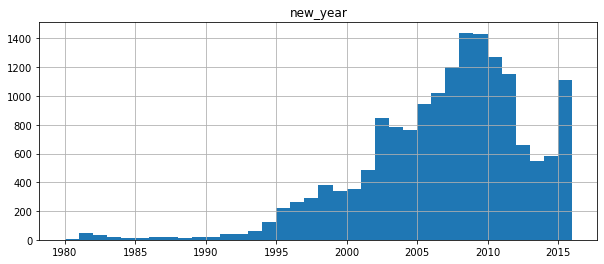

In [21]:
data.hist('new_year',bins=(data['new_year'].max()-data['new_year'].min()), figsize=(10, 4))

<b>Пик производства игр был между 2007 и 2010 годами, после 2011-2012 пошел спад и в 2016 году показатель начал выходить на прежний уровень. До 1995 года игр выпускалось меньше 200 в год и данные за этот период не так важны, учитывая так же то, что тогда не выставлялись оценки игроков и критиков</b>

<font color='magenta'><b>Комментарий наставника: </b> Корзины определены просто замечательно. Выводы правильные.</font>

## Как менялись продажи по платформам в разные года. Выберем 5 платформ с наибольшими суммарными продажами.

In [22]:
sales = data.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending = False)
sales = pd.DataFrame(sales.to_records())
top_platform = sales['platform'].head(5).tolist()
top_platform

['ps2', 'ds', 'ps3', 'wii', 'x360']

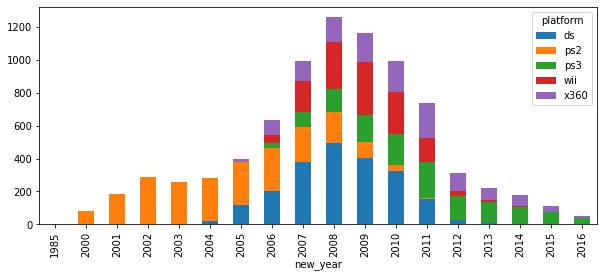

In [23]:
data.query('platform == @top_platform').groupby(['new_year','platform']).size().unstack().plot(kind='bar',stacked=True, figsize=(10, 4))
plt.show()

<b>Как видно из графика срок жизни платформы составляет примерно 10 лет, до появления новой версии. После выхода ПС3 выход игр на ПС2 уменьшился до 0 за 5 лет.</b>

<font color='magenta'><b>Комментарий наставника: </b> Все верно!</font>

## <font color='blue'>Какие платформы будут наиболее перспективными в следующем году.</font>

<font color='blue'><b>Для ответа на этот вопрос построим диаграмму с продажами по платформам, но только с 2012 года.</b></font>

In [24]:
sales_2012 = data.query('new_year > 2012').pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending = False)
sales_2012 = pd.DataFrame(sales_2012.to_records())
top_platform_2012 = sales_2012['platform'].head(5).tolist()
top_platform_2012

['ps4', 'psv', 'ps3', '3ds', 'xone']

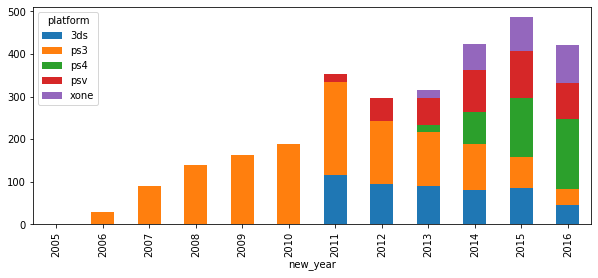

In [25]:
data.query('platform == @top_platform_2012').groupby(['new_year','platform']).size().unstack().plot(kind='bar',stacked=True, figsize=(10, 4))
plt.show()

### <font color='blue'>Вывод</font>
<font color='blue'><b>Данные за 2016 год неполные, но можно с уверенностью предположить, исходя из продаж игр за прошлые года на других платформах, что продажи игр на PS4 и Xbox One будут расти и еще не вышли на пиковый уровень.</b></font>

## Глобальные продажи каждой игры с разбивкой по платформам.

<b>Для исследования отстортируем игры по продажам с ограничением на год выпуска в 2006</b>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null float64
user_score         16567 non-null float64
rating             9868 non-null object
new_year           16567 non-null int64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [27]:
def sales(row):
    return row['na_sales']+row['eu_sales']+row['jp_sales']
data['sales'] = data.apply(sales, axis=1)
top_sales = data.query('new_year >= 2006').sort_values(by='sales', ascending = False)
top_sales.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_year,sales
0,wii sports \n,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,74.09
2,mario kart wii \n,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,32.23
3,wii sports resort \n,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,29.82
6,new super mario bros . \n,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006,26.92
8,new super mario bros . wii \n,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,2009,26.08


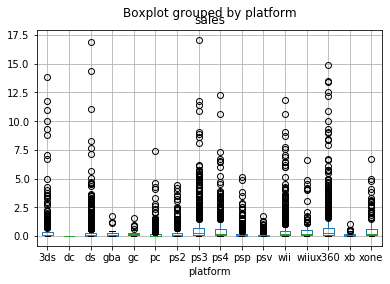

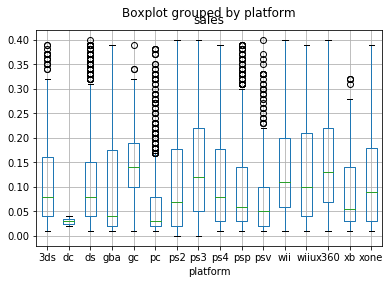

In [28]:
top_sales.query('sales < 20').boxplot(column='sales', by='platform')
top_sales.query('sales < 0.4').boxplot(column='sales', by='platform')


<b> Выводы:</b>: 
<ol type= «1″>
<li>Максимальная продажа в 74 миллиона копий отдельной игры у <b>wii</b></li>
<li>Дальше по количеству продаж отдельной игры лидируют <b>Nintendo DS и PS3 около 17 миллионов копий</b></li> 
<li>Средние продажи по всем платформам <b>находятся около с 0.1 до 0.15 миллионов копий</b></li> 
      
</ol>

## Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков на примере PS3

### Отзывы пользователей.

In [29]:
ps3_data_user = data.query('platform=="ps3"').pivot_table(index='user_score', values='sales', aggfunc='median').sort_values(by='user_score', ascending = False)

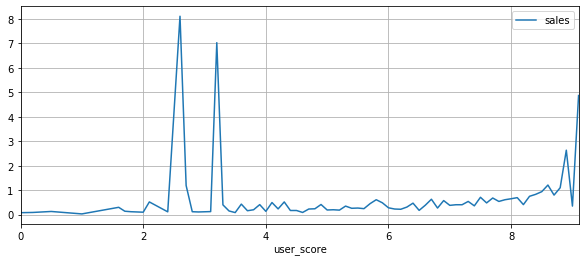

In [30]:
ps3_data_user.plot(grid=True, figsize=(10, 4))

In [31]:
data.query('platform=="ps3" and 2 < user_score <4').sort_values(by='sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_year,sales
37,call of duty : modern warfare 3 \n,ps3,2011,shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,2011,11.76
69,call of duty : ghosts \n,ps3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,2013,8.11
552,fifa 16 \n,ps3,2015,sports,0.41,1.84,0.05,0.40,0.0,3.2,E,2015,2.30
1314,madden nfl 15 \n,ps3,2014,sports,1.08,0.11,0.00,0.27,0.0,2.7,E,2014,1.19
1462,nba 2k15 \n,ps3,2014,sports,0.87,0.21,0.02,0.24,0.0,3.5,E,2014,1.10


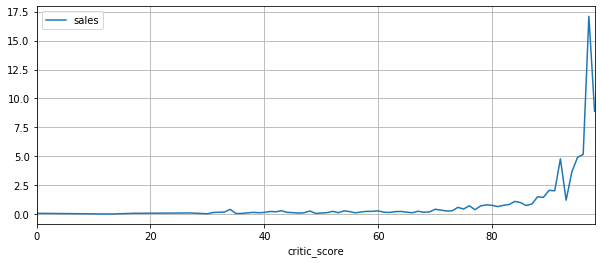

In [32]:
ps3_data_critic = data.query('platform=="ps3"').pivot_table(index='critic_score', values='sales', aggfunc='median').sort_values(by='critic_score', ascending = False)
ps3_data_critic.plot(grid=True, figsize=(10, 4))

In [33]:
ps3_data = data.query('platform=="ps3"')
print(ps3_data['sales'].corr(ps3_data['critic_score']))

0.35878128726247044


<b> Видна прямая связь между оценкой критиков и продажами, чем выше критики оценивают игру, тем больше ее покупают, но только при оценке критиков выше 80 баллов. Тогда как видно, что несколько релизов игр с низкими оценками игроков все равно добились высоких продаж. Это связано с тем, что отзывы игроки оставляют уже после того, как купили игру.</b>

## <font color='blue'>Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами</font>

<font color='blue'><b>Диаграмма рассеяния между отзывами критиков и продажами</b></font>

0.35878128726247044


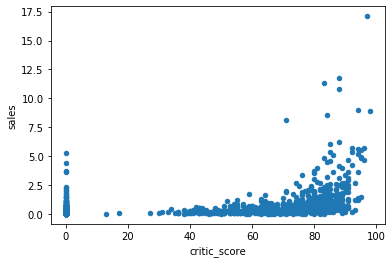

In [34]:
data.query('platform=="ps3"').plot(x='critic_score', y='sales', kind='scatter')
print(data.query('platform=="ps3"')['critic_score'].corr(data.query('platform=="ps3"')['sales']))

<font color='blue'><b>Диаграмма рассеяния между отзывами критиков и продажами</b></font>

0.27768682849956683


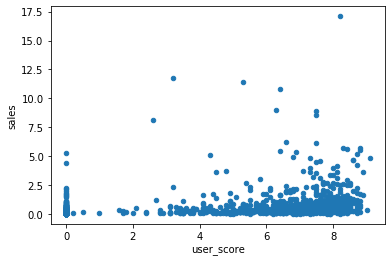

In [35]:
data.query('platform=="ps3"').plot(x='user_score', y='sales', kind='scatter')
print(data.query('platform=="ps3"')['user_score'].corr(data.query('platform=="ps3"')['sales']))

### <font color='blue'>Вывод</font>
<font color='blue'><b>Диаграмма рассеяния между отзывами критиков и продажами смещена вправо и вврех, а коэффициент корреляции между отзывами критиков и продажами выше, чем коэффициент корреляции между отзывами игроков и продажами, что подтверждает наш вывод о том, что отзывы критиков оказывают большее влияние на продажи</b></font>

## Посмотрим общее распределение игр по жанрам.

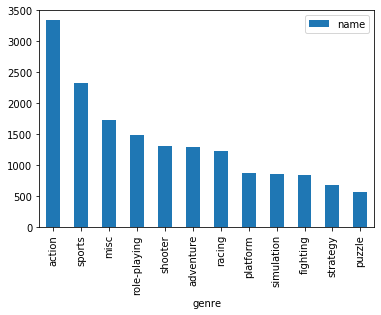

In [36]:
genre = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending = False)
genre = pd.DataFrame(genre.to_records())
genre.plot(x='genre',y='name',kind='bar')

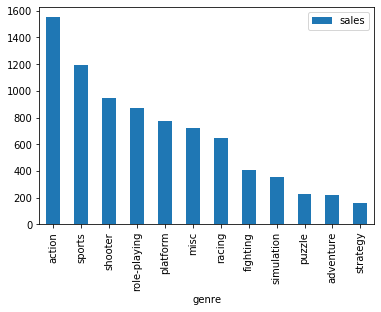

In [37]:
genre_sales = data.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values(by='sales', ascending = False)
genre_sales = pd.DataFrame(genre_sales.to_records())
genre_sales.plot(x='genre',y='sales',kind='bar')

### Выводы
<b>Платформеры приносят много денег (пятые в топе прибыльности), но их меньше всего выпускают. Жанры топ-5 по количеству выпущенных игр приносят большие продажи - action, sport, shooter, role-plaiyng</b>

<font color='magenta'><b>Комментарий наставника: </b> Отлично.</font>

# Шаг №4. Составим портрет пользователя каждого региона.

<b>Пользователь Северной Америки</b>

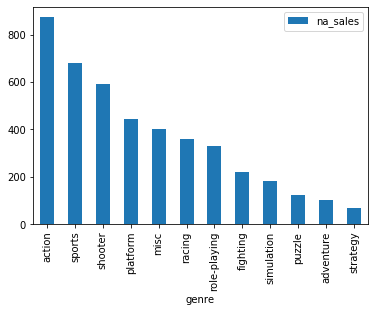

In [38]:
NA_users = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
NA_users = pd.DataFrame(NA_users.to_records())
NA_users.plot(x='genre',y='na_sales',kind='bar')

<b>Топ-3 Северной Америки не отличается от всего мира. Жанр платформеров, гонок и многожанровых игр сместили ролевые игры на 7-ое место</b>

<b>Пользователь Европы</b>

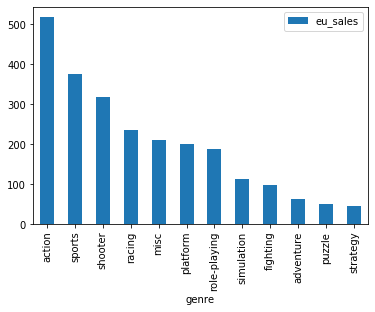

In [39]:
EU_users = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
EU_users = pd.DataFrame(EU_users.to_records())
EU_users.plot(x='genre',y='eu_sales',kind='bar')

<b>В целом Европейский рынок меньше по объему денежных средств, топ игр остался примерно таким же</b>

<b>Пользователь Японии</b>

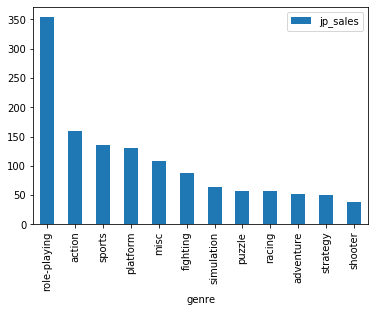

In [40]:
JP_users = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)
JP_users = pd.DataFrame(JP_users.to_records())
JP_users.plot(x='genre',y='jp_sales',kind='bar')

<b>В Японии лидерство захватывают ролевые игры, почти на 50% больше продаж ролевых игр, чем у второго места - экшенов. По объему продаж рынок меньше, чем в Европе</b>

### Влияние рейтинга ESRB на продажи в отдельном регионе.

<b>Северная Америка</b>

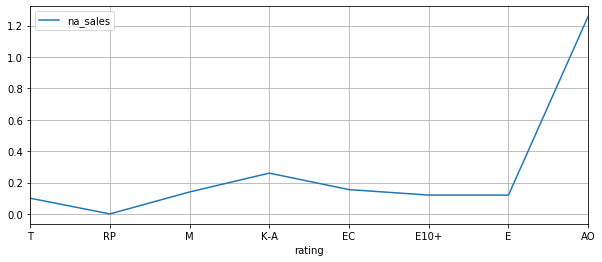

In [41]:
NA_sales = data[~data['rating'].isna()].pivot_table(index='rating', values='na_sales', aggfunc='median').sort_values(by='rating', ascending = False)
NA_sales.plot(grid=True, figsize=(10, 4))

<b>Европа</b>

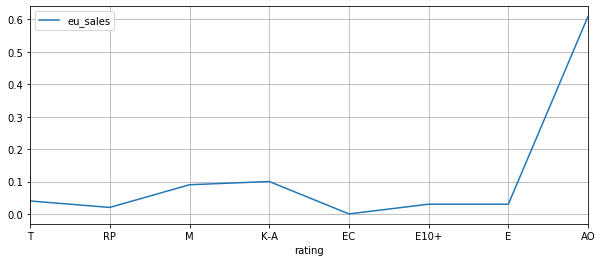

In [42]:
EU_sales = data[~data['rating'].isna()].pivot_table(index='rating', values='eu_sales', aggfunc='median').sort_values(by='rating', ascending = False)
EU_sales.plot(grid=True, figsize=(10, 4))

<b>Япония</b>

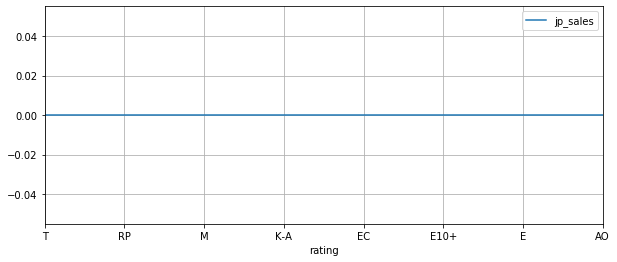

In [43]:
JP_sales = data[~data['rating'].isna()].pivot_table(index='rating', values='jp_sales', aggfunc='median').sort_values(by='rating', ascending = False)
JP_sales.plot(grid=True, figsize=(10, 4))

<b>В Европе и Америке наиболее высокие продажи у рейтинга AO - только для взрослых. В Японии нет данных по играм с выставленным возрастным рейтингом</b>

<font color='magenta'><b>Комментарий наставника: </b> Выделено главное.</font>

# Шаг 5. Проверка гипотез.

## Первая гипотеза.
<ol type= «1″>
<li><b>Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b></li>
<li><b>Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC отличаются</b></li>      
</ol>

In [44]:
data['genre'].value_counts()

action          3342
sports          2333
misc            1735
role-playing    1484
shooter         1311
adventure       1294
racing          1236
platform         879
simulation       860
fighting         842
strategy         678
puzzle           573
Name: genre, dtype: int64

Формируем наши датасеты. Проводим срезы по платформам.

In [45]:
sample_XboxOne = data.query('platform == "xone"').loc[:,'user_score']
sample_PC = data.query('platform == "pc"').loc[:,'user_score']

Задаем уровень критической важности, если р-value окажется меньше него - отвергаем нулевую гипотезу и принимаем альтернативную.

In [46]:
alpha = .05

Проверяем гипотезу о равенстве средних двух независимых совокупностей.

In [47]:
results = st.ttest_ind(
    sample_XboxOne, 
    sample_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0006171371903381416
Отвергаем нулевую гипотезу


In [48]:
print('Средние пользовательские рейтинги платформ Xbox One и PC отличаются и с вероятностью {:%} это будет случайно.'.format(results.pvalue))

Средние пользовательские рейтинги платформ Xbox One и PC отличаются и с вероятностью 0.061714% это будет случайно.


In [49]:
print(data.query('platform == "xone"').loc[:,'user_score'].mean())
print(data.query('platform == "pc"').loc[:,'user_score'].mean())

4.805263157894737
5.581030927835051


## Вторая гипотеза.
<ol type= «1″>
<li><b>Нулевая гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые</b></li>
<li><b>Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные</b></li>      
</ol>

Формируем наши датасеты. Проводим срезы по жанрам.

In [50]:
sample_Action = data.query('genre == "action"').loc[:,'user_score']
sample_Sports = data.query('genre == "sports"').loc[:,'user_score']
sample_Sports.head()

0     8.0
3     8.0
13    7.7
15    7.4
77    4.3
Name: user_score, dtype: float64

Задаем уровень критической важности, если р-value окажется меньше него - отвергаем нулевую гипотезу и принимаем альтернативную.

In [51]:
alpha = .05

Проверяем гипотезу о равенстве средних двух независимых совокупностей.

In [52]:
results = st.ttest_ind(
    sample_Action, 
    sample_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.659979852223255e-09
Отвергаем нулевую гипотезу


In [53]:
print(' Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные и с вероятностью {:%} это будет случайно.'.format(results.pvalue))

 Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные и с вероятностью 0.000001% это будет случайно.


In [54]:
print(data.query('genre == "action"').loc[:,'user_score'].mean())
print(data.query('genre == "sports"').loc[:,'user_score'].mean())

3.842848593656493
3.273939134162023


<font color='magenta'><b>Комментарий наставника: </b> С проверкой гипотез тоже все отл.</font>

# Шаг 6. Напишите общий вывод.

<ol type= «1″>
<li>По структуре рынки Северной Америки и Европы <b>похожи</b>, отличаются по объему <b>в Америке покупают больше</b></li>
<li>Рынок Японии <b>специфичный</b>, там любят РПГ и не любят шутеры. Рейтинги для европейцев не работают в Японии.</li>  
<li>Рейтинг критиков не отражает качество игры, но выгоден для маркетинга. Игры с высоким рейтингом от критиков получают больше денег. Но комьюнити игроков может выражать свое недовольство. Пример - <b>call of duty : modern warfare 3 и call of duty : ghosts </b></li> 
<li>Игры на PC имеют пользовательский рейтинг <b>выше</b>, чем игры на Xbox One</li> 
<li>Игры жанра Action имеют пользовательский рейтинг<b>выше</b>, чем игры жанра Спорт </li>
<li>Средняя продолжительность "жизни" платформы <b>10 лет</b>, пик выпуска игр на платформу составляет <b>5-6 лет</b></li>
<li>Единоличным лидером по максимальным проданным копиям игр является Wii и отдельно игра Wii Sports с <b>74 миллионами проданных копий</b></li>
<li><font color='blue'><b>Продажи игр на PS4 и Xbox One будут расти и еще не вышли на пиковый уровень, это самые перспективные платформы</b></font></li>
</ol>

<font color='magenta'><b>Комментарий наставника: </b> Вообще хочется прям половину работы затолкать в  преезнтацию в качестве примера, но тогда я же всем все заспойлерю.</font>